In [1]:
import jax.numpy as jnp
import numpy as np
from jax.tree_util import tree_flatten, tree_unflatten

np.random.seed(42)

V = 10.0
R1 = 4.0
C1 = 0.5

t_start = 0.0
t_end = 10.0
n_samples = 50

Ts = jnp.linspace(0, 8, 10)


def activation_R0(T):
    return 10*jnp.exp(-0.2*T)

def solution(t, T):
    return V/activation_R0(T) + (V/R1) * jnp.exp(-t/(R1*C1))

def get_domain():
    return jnp.array([[t_start, t_end], [min(Ts), max(Ts)]])

def get_initial_values():
    t0 = jnp.full(len(Ts), t_start)
    T0 = jnp.array(Ts)
    return t0, T0

def get_dataset():
    t = jnp.tile(jnp.linspace(t_start, t_end, n_samples), len(Ts))
    T = jnp.repeat(jnp.array(Ts), n_samples)
    #u1 = solution(t, T)
    u1 = solution(t, T) + np.random.normal(loc=0.0, scale=2, size=u1.shape)
    u2 = activation_R0(T)
    return t, T, u1, u2

def get_ic():
    t0s = jnp.zeros(len(Ts))
    return solution(t0s, Ts)


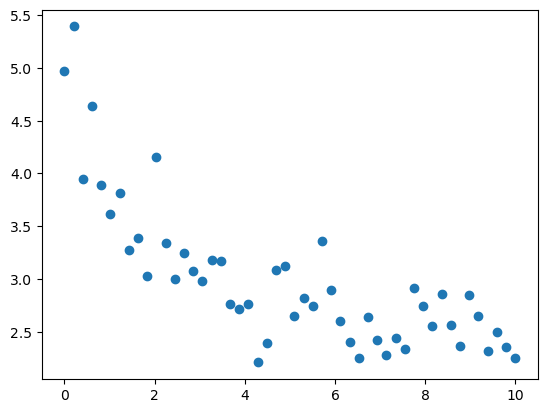

In [12]:
import matplotlib.pyplot as plt

t = jnp.linspace(t_start, t_end, n_samples)
T = jnp.repeat(Ts[0], n_samples)
u = solution(t,T) 
noise = np.random.normal(loc=jnp.mean(u), scale=0.2*jnp.abs(u), size=u.shape)

plt.scatter(t,u+noise)

In [ ]:
print(u + np.random.normal(loc=0.0, scale=10 * jnp.abs(u), size=u.shape))

In [ ]:
print(u)